추노 노드 발표 :: E6 작사가 인공지능 만들기
===


## 목표

- \<start\> i love 다음에 올 다음 가사를 이어나가기

## RNN 모델 :: Many to Many

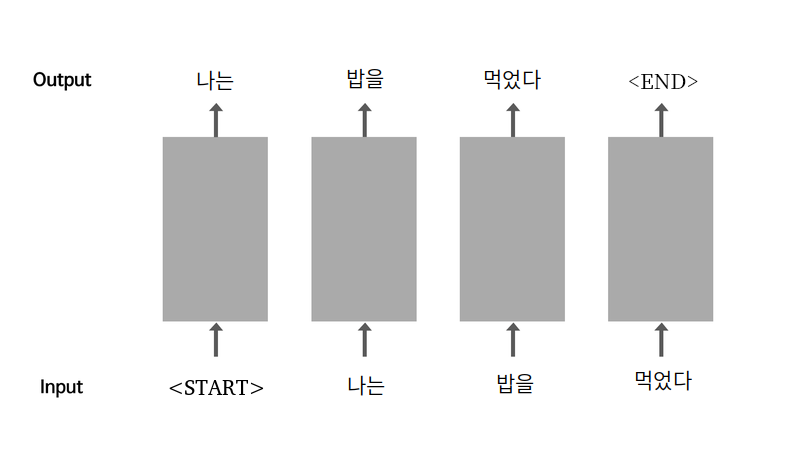

## 핵심

1. Tokenizer를 이용한 문장을 띄어쓰기 단위로 나누어 토큰화

2. 단어들을 Tensor로 만들기
![스크린샷, 2021-03-01 13-04-57](https://user-images.githubusercontent.com/70703320/109450666-cab90580-7a8e-11eb-83f1-734649fdbc4a.png)

3. 소스문장(source sentence)과 타겟문장(target sentence)
![스크린샷, 2021-03-01 12-28-48](https://user-images.githubusercontent.com/70703320/109450695-e7553d80-7a8e-11eb-9f4d-dca23eb96281.png)



## 같이 살펴볼 코드

- 토큰화(Tokenize): 정규표현식을 사용 (띄어쓰기로 분류, 모두 소문자로, 특수문자 제거)

- 15개 이하의 token만 남기기

- model.fit(validation set과 함께 학습하기)


## 데이터

- [Song Lyrics kaggle](https://www.kaggle.com/paultimothymooney/poetry?select=michael-jackson.txt)


## 정규표현식 관련

In [5]:
import re  # 정규표현식을 위한 라이브러리

def preprocess_sentence(sentence):  # preprocess_sentence 함수 만들기, 매개변수: sentence
    sentence = sentence.lower().strip()  # 소문자로 바꾸기, 양쪽 공백 지우기       
  
    
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)  # 패턴의 특수문자를 만나면 특수문자 양쪽에 공백을 추가       
    sentence = re.sub(r'[" "]+', " ", sentence)  # 공백 패턴을 만나면 스페이스 1개로 치환                 
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)  # a-zA-Z?.!,¿ 패턴을 제외한 모든 문자를 스페이스 1개로 치환

    sentence = sentence.strip()  # 양쪽 공백 지우기

    sentence = '<start> ' + sentence + ' <end>'  # 문장 앞에 <start> 를 문장 뒤에  <end>를 붙여줌     

    
    return sentence  # 매개변수를 return

print(preprocess_sentence("This @_is ;;;sample        sentence."))  #함수 확인을 위해 예시문장 출력

<start> this is sample sentence . <end>


### 소문자로 바꾸기, 양쪽 공백 지우기

In [1]:
sentence = ' This @_is ;;;sample        sentence. '
sentence.lower().strip()

'this @_is ;;;sample        sentence.'

### re.sub에 관하여

In [ ]:
re.sub(pattern, repl, string)

string에서 pattern과 매치하는 텍스트를 repl로 치환한다.

대체로 문자열 앞에 r을 붙여주어 이스케이프를 방지한다.

[출처](https://python.bakyeono.net/chapter-11-2.html)

#### 패턴의 특수문자를 만나면 특수문자 양쪽에 공백을 추가

In [2]:
import re

sentence = ' This @_is ;;;sample        sentence. '
re.sub(r"([?.!,¿])", r" \1 ", sentence)

' This @_is ;;;sample        sentence .  '

[r" \1" = re.search.group(1)](https://stackoverflow.com/questions/20802056/python-regular-expression-1/20802242)

[re.search.group(1)의 의미?](https://wikidocs.net/4309)

#### 공백 패턴을 만나면 스페이스 1개로 치환 

In [3]:
sentence = ' This @_is ;;;sample        sentence. '
re.sub(r'[" "]+', " ", sentence)

' This @_is ;;;sample sentence. '

#### a-zA-Z?.!,¿ 패턴을 제외한 모든 문자를 스페이스 1개로 치환

In [4]:
sentence = ' This @_is ;;;sample        sentence. '
re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)

' This is sample sentence. '

## 토큰 15개 이하만 남기기

방법 1. tokenize 전에 자르기 :: [웅제님 방법](https://github.com/Woonn/Exploration/blob/master/%5BE6%5DLyricist.ipynb)

In [ ]:
corpus1 = []
# 원본 데이터에서 sentence를 뽑아서
for sentence in raw_corpus:
    if len(sentence) == 0: continue
    #elif len(sentence) > 16: continue # 이걸로 거르면 13200개밖에 안나옴, 이건 문장의 글자 수 기준으로.. 띄어쓰기 기준으로 나눈 단어를 기준으로 해야함
    # sentence가 공백이 아니면 sentence를 인자로 받아 위의 함수를 실행
    #elif len(sentence.split(" ")) > 15: continue
    corpus1.append(preprocess_sentence(sentence))
        
# for 문 사용
corpus = []
for sentence in corpus1:
    if len(sentence.split("")) > 15: 
        pass
    else: 
        corpuse.appned(sentence)

방법 2. tokenize에서 짜르기

In [ ]:
import numpy as np  # 행렬연산을 위한 라이브러리           
import tensorflow as tf  # 텐서를 만들어주기 위한 라이브러리     

token_tray = []  # 빈 token_tray 리스트 만들기

def tokenize(corpus):  # tokenize 함수 정의, 매개변수 corpus
    
    tokenizer = tf.keras.preprocessing.text.Tokenizer(  # tesorflow에서 케라스 불러들이고 Tokenizer를 사용
        num_words=12000,  # 전체 단어의 개수를 12000으로!
        filters='',  # default     
        oov_token="<unk>"  # 사전에 없는 단어를 <unk>로 지정
    )
    tokenizer.fit_on_texts(corpus)  # corpus로부터 Tokenizer가 사전을 자동구축  
    
    tensor = tokenizer.texts_to_sequences(corpus)  # 사전으로부터 corpus를 해석해 tensor로 변환
    
    for str_len in tensor:  # tensor에서 원소들을 하나 꺼내어
        if len(str_len) < 16:  # 길이가 15이하이면 
            token_tray.append(str_len)  # token_tray 리스트에 넣어줌
        else:  # 아니면
            continue  # 패쓰!
    
    # maxlen = 15으로, post방식으로 padding 해줌
    tensor_post = tf.keras.preprocessing.sequence.pad_sequences(token_tray, maxlen=15, padding='post')
    
    # maxlen = 15으로, pre방식으로 padding 해줌
    tensor_pre = tf.keras.preprocessing.sequence.pad_sequences(token_tray, maxlen=15, padding='pre')

    print(tensor_post, tensor_pre, tokenizer)  # tensor_post, tensor_pre, tokenizer를 프린트
    return tensor_post, tensor_pre, tokenizer  # tensor_post, tensor_pre, tokenizer를 리턴

tensor_post, tensor_pre, tokenizer = tokenize(corpus)  # corpus에 대하여 토큰화!

tensor 확인

In [19]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(  # tesorflow에서 케라스 불러들이고 Tokenizer를 사용
        num_words=12000,  # 전체 단어의 개수를 12000으로!
        filters='',  # default     
        oov_token="<unk>"  # 사전에 없는 단어를 <unk>로 지정
    )

tokenizer.fit_on_texts(corpus)
tensor = tokenizer.texts_to_sequences(corpus)

tensor[:5]

[[2, 641, 732, 28, 265, 16, 2400, 35, 70, 216, 3],
 [2, 1, 14, 9, 1867, 19, 2966, 3],
 [2, 494, 2043, 29, 13, 2898, 3],
 [2, 1374, 139, 19, 820, 3],
 [2, 13, 2400, 13, 289, 3]]

In [ ]:
## buffer :: 데이터 수신할 때 시간의 차이가 나는 경우 임시로 저장하는 것
## batch :: 일괄적으로 한 꺼번에 처리하는 것

BUFFER_SIZE_post = len(enc_post_train)  # buffer size 조절
BATCH_SIZE_post = 256  # batch size 조절
steps_per_epoch_post = len(enc_post_train) // BATCH_SIZE_post  # epoch별 step 크기 조절

VOCAB_SIZE_post = tokenizer.num_words + 1  # 사전에 0 : <pad>를 붙여 12001개

# post의 train데이터를 tf.data.Dataset인 객체로 생성하는 역할
# 텐서플로우에서 사용할 경우 데이터 입력 파이프라인을 통한 속도 개선 및 각종 편의기능을 제공
# BUFFER_SIZE_post개의 slice를 만들어주는 역할

dataset_post = tf.data.Dataset.from_tensor_slices((enc_post_train, dec_post_train)).shuffle(BUFFER_SIZE_post)


# dataset에 epoch별 step 크기를 지정 
# 데이터 세트의 연속 요소를 배치로 결합합니다.

dataset_post = dataset_post.batch(BATCH_SIZE_post, drop_remainder=True)
dataset_post  # 확인

## 정리방법추천?!

AI engineer는 데이터를 통해 어떤 문제를 해결하는 역할이라고 생각. 데이터에 대한 지식이 필요하고 전처리와 시각화가 필요하며 가장 좋은 모델을 선정하는 것이 핵심이지 않을까? 


### 1. 데이터에 관한 정보 찾아보기
[E5](https://github.com/gotjd709/AIffel_Daejeon/blob/master/exploration/%5BE5%5D-project_Spectrogram_Classification.ipynb) 에서 데이터셋 정보 부분 참조

### 2. 데이터 전처리 관련 시각화
[E6](https://github.com/gotjd709/AIffel_Daejeon/blob/master/exploration/%5BE6%5D-project_Lyrics_Maker.ipynb) 에서 문장의 길이 별 분포 시각화

### 3. 모델 및 하이퍼파라미터의 Accuracy 비교
[E5](https://github.com/gotjd709/AIffel_Daejeon/blob/master/exploration/%5BE5%5D-project_Spectrogram_Classification.ipynb) 에서 Conv1D, Skip-connection, Conv2D 모델의 accuracy 비교

[E6](https://github.com/gotjd709/AIffel_Daejeon/blob/master/exploration/%5BE6%5D-project_Lyrics_Maker.ipynb) pre 모델과 post 모델을 비교 (accuracy 및 결과)  [정리](https://biology-statistics-programming.tistory.com/42?category=955669)